___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

IndentationError: unexpected indent (2850649071.py, line 3)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
    precision_score,
    make_scorer,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    average_precision_score,
    roc_curve,
    auc,
)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings

warnings.filterwarnings("ignore")

pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 1000)
pd.set_option("display.width", 1000)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [2]:
df_male =   pd.read_csv("https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr", encoding="latin-1")

In [3]:
df_female = pd.read_csv("https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq")

In [4]:
df_female.head(5)

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [5]:
df_female.shape

(1986, 108)

In [6]:
df_male.head(5)

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [7]:
df_male.shape

(4082, 108)

In [8]:
df_female.rename(columns= {"SubjectId": "subjectid"}, inplace= True)

In [9]:
print(df_male.shape)
print(df_female.shape)

(4082, 108)
(1986, 108)


In [10]:
df = pd.concat([df_male, df_female], axis=0, ignore_index=True)
df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [11]:
df.shape

(6068, 108)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 5.0+ MB


## Explore Data

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 5.0+ MB


In [14]:
df.info(max_cols=110)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 108 columns):
 #    Column                          Non-Null Count  Dtype 
---   ------                          --------------  ----- 
 0    subjectid                       6068 non-null   int64 
 1    abdominalextensiondepthsitting  6068 non-null   int64 
 2    acromialheight                  6068 non-null   int64 
 3    acromionradialelength           6068 non-null   int64 
 4    anklecircumference              6068 non-null   int64 
 5    axillaheight                    6068 non-null   int64 
 6    balloffootcircumference         6068 non-null   int64 
 7    balloffootlength                6068 non-null   int64 
 8    biacromialbreadth               6068 non-null   int64 
 9    bicepscircumferenceflexed       6068 non-null   int64 
 10   bicristalbreadth                6068 non-null   int64 
 11   bideltoidbreadth                6068 non-null   int64 
 12   bimalleolarbreadth              

In [15]:
df.shape

(6068, 108)

In [16]:
df.isnull().sum().any()

True

In [17]:
df.duplicated().sum()

0

In [18]:
print(df.isna().sum().to_string())

subjectid                            0
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

In [19]:
df['Ethnicity']

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
6063    Mexican
6064    Mexican
6065        NaN
6066    Mexican
6067    Mexican
Name: Ethnicity, Length: 6068, dtype: object

In [20]:
NaN_list =[]
for columns in df.columns:
    if df[columns].isnull().sum()>0:
        print("{name} = {qty}".format(name = columns, qty = df[columns].isnull().sum()))
        NaN_list.append(columns)

Ethnicity = 4647


In [21]:
NaN_list

['Ethnicity']

In [22]:
df = df.drop(NaN_list, axis=1)

In [23]:
df.isnull().sum().any()

False

In [24]:
df.shape

(6068, 107)

In [25]:
df[["DODRace","SubjectNumericRace"]]

,DODRace,SubjectNumericRace
0,1,1
1,1,1
2,2,2
3,1,1
4,2,2
...,...,...
6063,3,3
6064,3,3
6065,2,2
6066,3,3


In [26]:
df.drop("SubjectNumericRace", axis = 1, inplace = True)

In [27]:
df.shape

(6068, 106)

In [28]:
df.DODRace.value_counts(dropna = False)

DODRace
1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: count, dtype: int64

In [29]:
df = df[df["DODRace"].isin([1,2,3])]
df.DODRace.value_counts(dropna = False)

DODRace
1    3792
2    1298
3     679
Name: count, dtype: int64

In [30]:
for col in df.select_dtypes("object"):
    print(f"{col} has {df[col].nunique()} unique value")

Gender has 2 unique value
Date has 253 unique value
Installation has 12 unique value
Component has 3 unique value
Branch has 3 unique value
PrimaryMOS has 281 unique value
SubjectsBirthLocation has 136 unique value
WritingPreference has 3 unique value


In [31]:
df.shape

(5769, 106)

In [32]:
df[['Weightlbs','weightkg']]

,Weightlbs,weightkg
0,180,815
1,160,726
2,205,929
3,175,794
4,213,946
...,...,...
6063,180,832
6064,150,717
6065,168,762
6066,133,632


In [33]:
df.drop(["Weightlbs"], axis = 1, inplace=True)

In [34]:
df.shape

(5769, 105)

In [35]:
df.select_dtypes(exclude=[np.number]).head().T

,0,1,2,3,4
Gender,Male,Male,Male,Male,Male
Date,4-Oct-10,4-Oct-10,4-Oct-10,12-Oct-10,12-Oct-10
Installation,Fort Hood,Fort Hood,Fort Hood,Fort Hood,Fort Hood
Component,Regular Army,Regular Army,Regular Army,Regular Army,Regular Army
Branch,Combat Arms,Combat Support,Combat Support,Combat Service Support,Combat Service Support
PrimaryMOS,19D,68W,68W,88M,92G
SubjectsBirthLocation,North Dakota,New York,New York,Wisconsin,North Carolina
WritingPreference,Right hand,Left hand,Left hand,Right hand,Right hand


In [36]:
for columns in df.select_dtypes(exclude=[np.number]).columns:
    print(f"{columns} has {df[columns].nunique()} unique value")

Gender has 2 unique value
Date has 253 unique value
Installation has 12 unique value
Component has 3 unique value
Branch has 3 unique value
PrimaryMOS has 281 unique value
SubjectsBirthLocation has 136 unique value
WritingPreference has 3 unique value


In [37]:
#["Date", "Installation", "Component","Branch","Weightlbs","Heightin","SubjectNumericRace","PrimaryMOS","subjectid"]

In [38]:
df.shape

(5769, 105)

In [39]:
df.head().T

,0,1,2,3,4
subjectid,10027,10032,10033,10092,10093
abdominalextensiondepthsitting,266,233,287,234,250
acromialheight,1467,1395,1430,1347,1585
acromionradialelength,337,326,341,310,372
anklecircumference,222,220,230,230,247
axillaheight,1347,1293,1327,1239,1478
balloffootcircumference,253,245,256,262,267
balloffootlength,202,193,196,199,224
biacromialbreadth,401,394,427,401,435
bicepscircumferenceflexed,369,338,408,359,356


In [40]:
df.drop("subjectid", axis = 1, inplace = True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5769 entries, 0 to 6067
Columns: 104 entries, abdominalextensiondepthsitting to WritingPreference
dtypes: int64(96), object(8)
memory usage: 4.6+ MB


DODRace
1    3792
2    1298
3     679
Name: count, dtype: int64


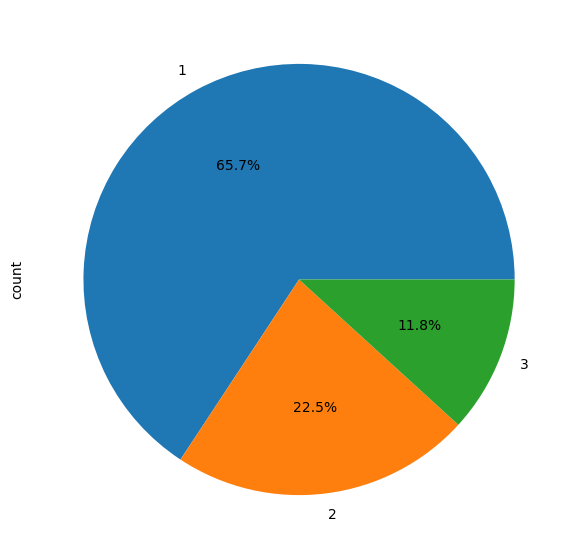

In [42]:
print(df["DODRace"].value_counts());
df["DODRace"].value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(7,7));

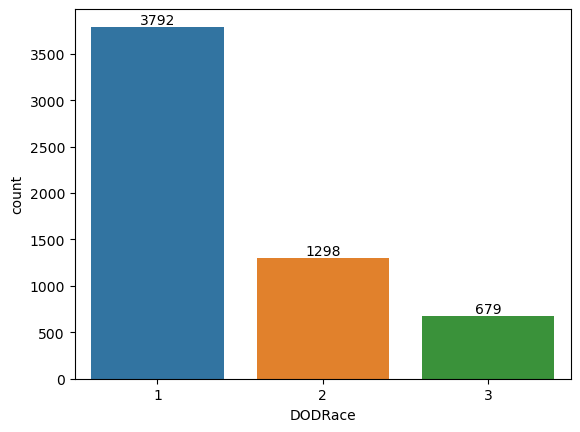

In [43]:
ax = sns.countplot(x="DODRace", data = df)
ax.bar_label(ax.containers[0]);

In [44]:
# Assuming df contains both numeric and non-numeric columns
numeric_df = df.select_dtypes(include='number')
df_temp = numeric_df.corr()

count = 0 
feature = []
collinear = []

for col in df_temp.columns:
    for i in df_temp.index:
        if (df_temp[col][i] > 0.9 and df_temp[col][i] < 1) or (df_temp[col][i] < -0.9 and df_temp[col][i] > -1):
            feature.append(col)
            collinear.append(i)

print("Number of strongly correlated features:", count)  

Number of strongly correlated features: 0


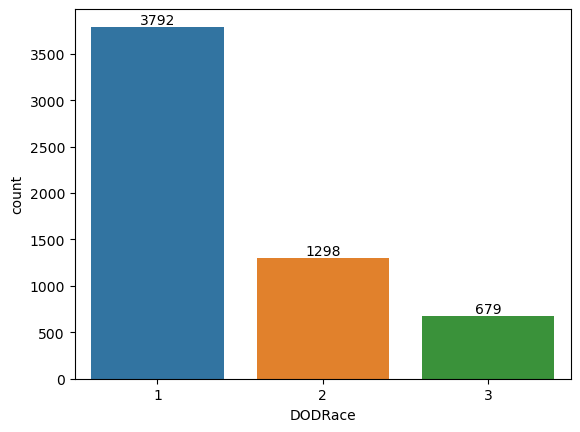

In [45]:
ax = sns.countplot(x="DODRace", data = df)
ax.bar_label(ax.containers[0]);

In [46]:
df.SubjectsBirthLocation.value_counts()

SubjectsBirthLocation
California                417
New York                  411
Texas                     386
Indiana                   264
Florida                   210
Illinois                  210
Oklahoma                  205
Minnesota                 194
Michigan                  194
Mississippi               193
Georgia                   168
Alabama                   164
South Carolina            161
North Carolina            145
Ohio                      139
Louisiana                 136
Pennsylvania              130
Virginia                  113
Massachusetts             109
Wisconsin                  99
Germany                    90
New Jersey                 88
Puerto Rico                88
Missouri                   83
Colorado                   78
Maryland                   78
Arizona                    75
Tennessee                  74
Kentucky                   67
Kansas                     62
Washington                 61
Iowa                       55
South Dakota      

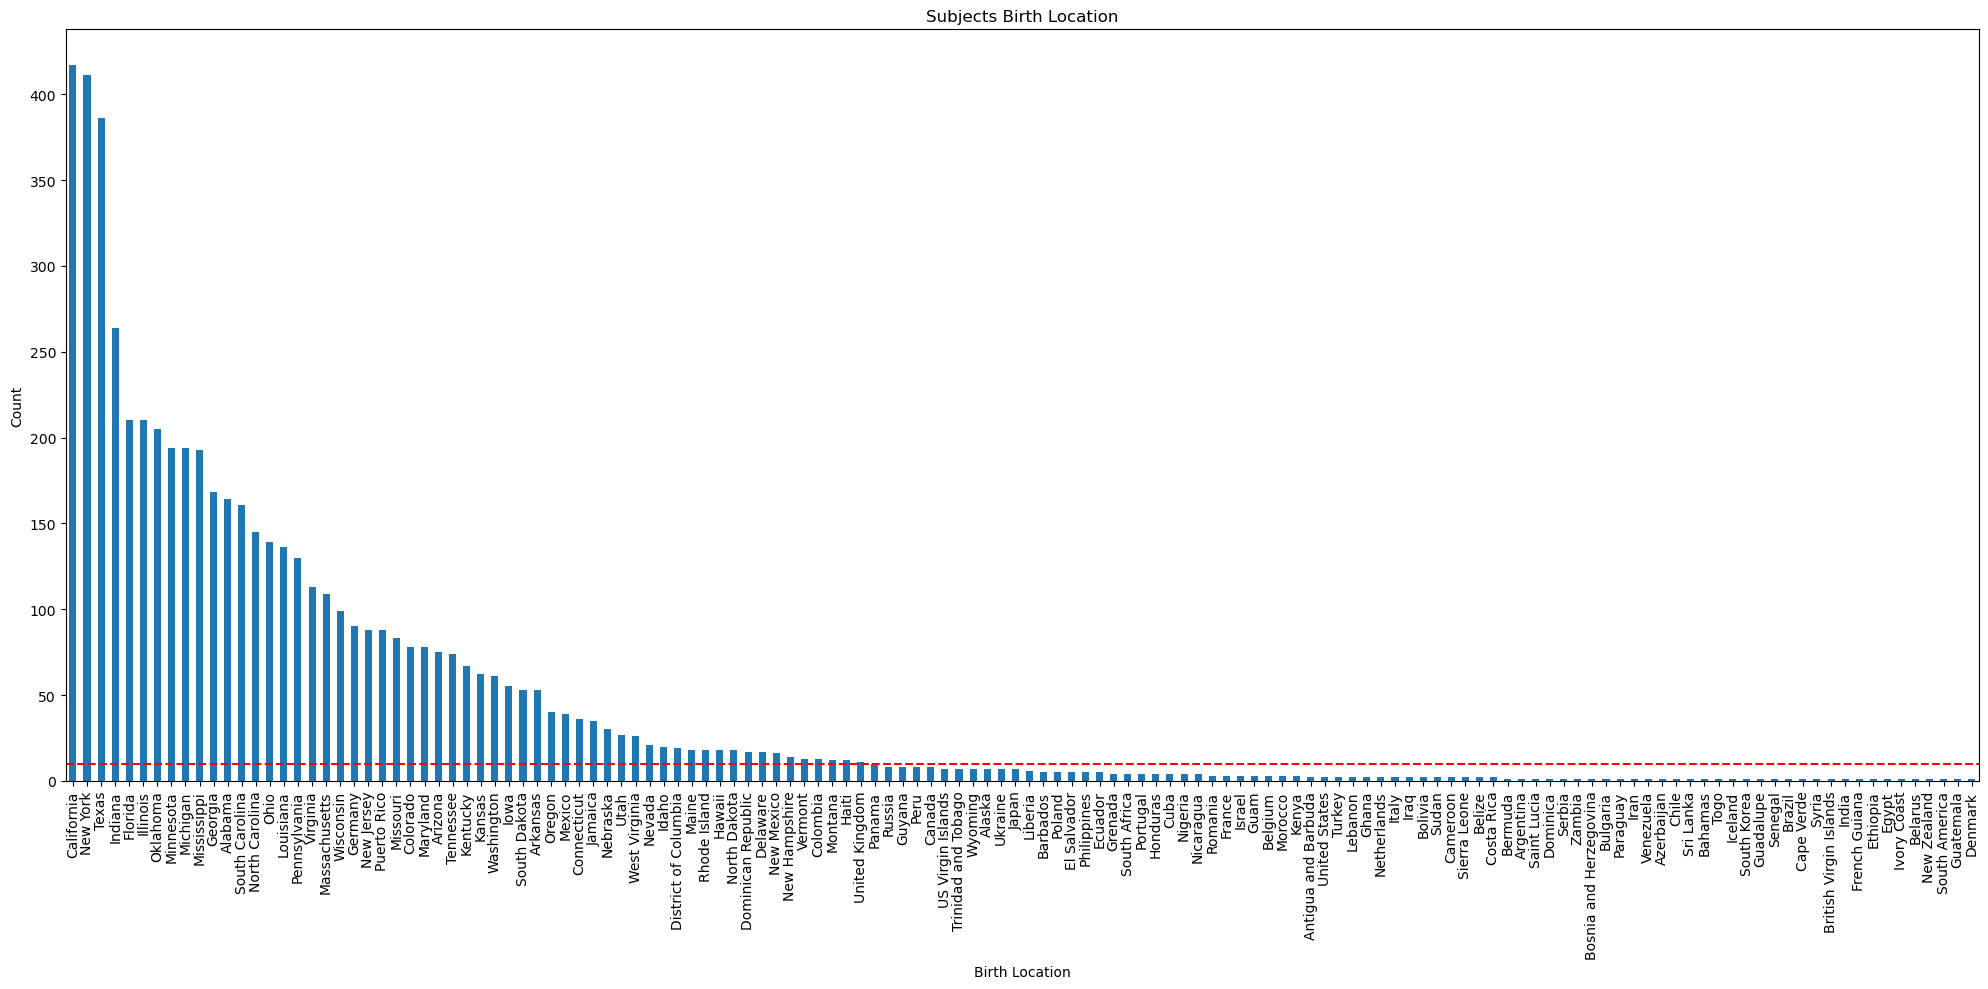

In [47]:
df.SubjectsBirthLocation.value_counts().plot(kind="bar", figsize=(20,10))
plt.title("Subjects Birth Location")
plt.xlabel("Birth Location")
plt.ylabel("Count")
plt.axhline(10, color='r', linestyle='--')  # Some research says 10 rows are enough for each category to be represented
plt.tight_layout();

In [48]:
# This is a dictionary of states and their regions.
states_by_region = {
    "Alabama": "South",
    "Alaska": "West",
    "Arizona": "West",
    "Arkansas": "South",
    "California": "West",
    "Colorado": "West",
    "Connecticut": "Northeast",
    "Delaware": "Mid Atlantic",
    "Florida": "South",
    "Georgia": "South",
    "Hawaii": "West",
    "Idaho": "West",
    "Illinois": "Midwest",
    "Indiana": "Midwest",
    "Iowa": "Midwest",
    "Kansas": "Midwest",
    "Kentucky": "South",
    "Louisiana": "South",
    "Maine": "Northeast",
    "Maryland": "Mid Atlantic",
    "Massachusetts": "Northeast",
    "Michigan": "Midwest",
    "Minnesota": "Midwest",
    "Mississippi": "South",
    "Missouri": "Midwest",
    "Montana": "West",
    "Nebraska": "Midwest",
    "Nevada": "West",
    "New Hampshire": "Northeast",
    "New Jersey": "Mid Atlantic",
    "New Mexico": "West",
    "New York": "Northeast",
    "North Carolina": "South",
    "North Dakota": "Midwest",
    "Ohio": "Midwest",
    "Oklahoma": "South",
    "Oregon": "West",
    "Pennsylvania": "Mid Atlantic",
    "Rhode Island": "Northeast",
    "South Carolina": "South",
    "South Dakota": "Midwest",
    "Tennessee": "South",
    "Texas": "South",
    "Utah": "West",
    "Vermont": "Northeast",
    "Virginia": "Mid Atlantic",
    "Washington": "West",
    "West Virginia": "South",
    "Wisconsin": "Midwest",
    "Wyoming": "West",
    "District of Columbia": "Mid Atlantic"
}


In [49]:
# This is a dictionary of the countries and their continents.
countries_by_continent = {
    "Afghanistan": "Asia",
    "Albania": "Europe",
    "Algeria": "Africa",
    "American Samoa": "Oceania",
    "Andorra": "Europe",
    "Angola": "Africa",
    "Antigua and Barbuda": "North America",
    "Argentina": "South America",
    "Armenia": "Asia",
    "Australia": "Oceania",
    "Austria": "Europe",
    "Azerbaijan": "Asia",
    "Bahamas": "North America",
    "Bahrain": "Asia",
    "Bangladesh": "Asia",
    "Barbados": "North America",
    "Belarus": "Europe",
    "Belgium": "Europe",
    "Belize": "North America",
    "Benin": "Africa",
    "Bhutan": "Asia",
    "Bolivia": "South America",
    "Bosnia and Herzegovina": "Europe",
    "Botswana": "Africa",
    "Brazil": "South America",
    "British Virgin Islands": "North America",
    "Brunei": "Asia",
    "Bulgaria": "Europe",
    "Burkina Faso": "Africa",
    "Burundi": "Africa",
    "Cambodia": "Asia",
    "Cameroon": "Africa",
    "Canada": "North America",
    "Cape Verde": "Africa",
    "Central African Republic": "Africa",
    "Chad": "Africa",
    "Chile": "South America",
    "China": "Asia",
    "Colombia": "South America",
    "Comoros": "Africa",
    "Congo, Democratic Republic of the": "Africa",
    "Congo, Republic of the": "Africa",
    "Costa Rica": "North America",
    "Côte d'Ivoire": "Africa",
    "Croatia": "Europe",
    "Cuba": "North America",
    "Cyprus": "Europe",
    "Czech Republic": "Europe",
    "Denmark": "Europe",
    "Djibouti": "Africa",
    "Dominica": "North America",
    "Dominican Republic": "North America",
    "East Timor": "Asia",
    "Ecuador": "South America",
    "Egypt": "Africa",
    "El Salvador": "North America",
    "England": "Europe",
    "Equatorial Guinea": "Africa",
    "Eritrea": "Africa",
    "Estonia": "Europe",
    "Eswatini": "Africa",
    "Ethiopia": "Africa",
    "Federated States of Micronesia": "Oceania",
    "Fiji": "Oceania",
    "Finland": "Europe",
    "France": "Europe",
    "French Guiana": "South America",
    "Gabon": "Africa",
    "Gambia": "Africa",
    "Georgia": "Asia",
    "Germany": "Europe",
    "Ghana": "Africa",
    "Greece": "Europe",
    "Grenada": "North America",
    "Guam": "Oceania",
    "Guadalupe" : "North America",
    "Guatemala": "North America",
    "Guinea": "Africa",
    "Guinea-Bissau": "Africa",
    "Guyana": "South America",
    "Haiti": "North America",
    "Honduras": "North America",
    "Hungary": "Europe",
    "Iceland": "Europe",
    "India": "Asia",
    "Indonesia": "Asia",
    "Iran": "Asia",
    "Iraq": "Asia",
    "Ireland": "Europe",
    "Israel": "Asia",
    "Italy": "Europe",
    "Ivory Coast": "Africa",
    "Jamaica": "North America",
    "Japan": "Asia",
    "Jordan": "Asia",
    "Kazakhstan": "Asia",
    "Kenya": "Africa",
    "Kiribati": "Oceania",
    "Kosovo": "Europe",
    "Kuwait": "Asia",
    "Kyrgyzstan": "Asia",
    "Laos": "Asia",
    "Latvia": "Europe",
    "Lebanon": "Asia",
    "Lesotho": "Africa",
    "Liberia": "Africa",
    "Libya": "Africa",
    "Liechtenstein": "Europe",
    "Lithuania": "Europe",
    "Luxembourg": "Europe",
    "Macedonia, Republic of": "Europe",
    "Madagascar": "Africa",
    "Malawi": "Africa",
    "Malaysia": "Asia",
    "Maldives": "Asia",
    "Mali": "Africa",
    "Malta": "Europe",
    "Marshall Islands": "Oceania",
    "Mauritania": "Africa",
    "Mauritius": "Africa",
    "Mexico": "North America",
    "Micronesia": "Oceania",
    "Moldova": "Europe",
    "Monaco": "Europe",
    "Mongolia": "Asia",
    "Montenegro": "Europe",
    "Morocco": "Africa",
    "Mozambique": "Africa",
    "Myanmar (Burma)": "Asia",
    "Namibia": "Africa",
    "Nauru": "Oceania",
    "Nepal": "Asia",
    "Netherlands": "Europe",
    "New Zealand": "Oceania",
    "Nicaragua": "North America",
    "Niger": "Africa",
    "Nigeria": "Africa",
    "North Korea": "Asia",
    "Norway": "Europe",
    "Oman": "Asia",
    "Pakistan": "Asia",
    "Palau": "Oceania",
    "Palestine": "Asia",
    "Panama": "North America",
    "Papua New Guinea": "Oceania",
    "Paraguay": "South America",
    "Peru": "South America",
    "Philippines": "Asia",
    "Poland": "Europe",
    "Portugal": "Europe",
    "Puerto Rico": "North America",
    "Qatar": "Asia",
    "Romania": "Europe",
    "Russia": "Europe",
    "Rwanda": "Africa",
    "Saint Kitts and Nevis": "North America",
    "Saint Lucia": "North America",
    "Saint Vincent and the Grenadines": "North America",
    "Samoa": "Oceania",
    "San Marino": "Europe",
    "Sao Tome and Principe": "Africa",
    "Saudi Arabia": "Asia",
    "Scotland": "Europe",
    "Senegal": "Africa",
    "Serbia": "Europe",
    "Seychelles": "Africa",
    "Sierra Leone": "Africa",
    "Singapore": "Asia",
    "Slovakia": "Europe",
    "Slovenia": "Europe",
    "Solomon Islands": "Oceania",
    "Somalia": "Africa",
    "South Africa": "Africa",
    "South Korea": "Asia",
    "South Sudan": "Africa",
    "Spain": "Europe",
    "Sri Lanka": "Asia",
    "Sudan": "Africa",
    "Suriname": "South America",
    "Swaziland": "Africa",
    "Sweden": "Europe",
    "Switzerland": "Europe",
    "Syria": "Asia",
    "Taiwan": "Asia",
    "Tajikistan": "Asia",
    "Tanzania": "Africa",
    "Thailand": "Asia",
    "Togo": "Africa",
    "Tonga": "Oceania",
    "Trinidad and Tobago": "North America",
    "Tunisia": "Africa",
    "Turkey": "Europe",
    "Turkmenistan": "Asia",
    "Tuvalu": "Oceania",
    "Uganda": "Africa",
    "Ukraine": "Europe",
    "United Arab Emirates": "Asia",
    "United Kingdom": "Europe",
    "United States": "North America",
    "Uruguay": "South America",
    "US Virgin Islands": "North America",
    "Uzbekistan": "Asia",
    "Vanuatu": "Oceania",
    "Vatican City": "Europe",
    "Venezuela": "South America",
    "Vietnam": "Asia",
    "Wales": "Europe",
    "Yemen": "Asia",
    "Zambia": "Africa",
    "Zimbabwe": "Africa",
    "South America": "South America",
    "Burma": "Asia",
    "Korea": "Asia",
    "Northern Mariana Islands": "Oceania",
    "Bermuda": "North America",
}


In [50]:
df["SubjectsBirthLocation"] = [i if i in states_by_region else countries_by_continent[i] for i in df["SubjectsBirthLocation"].values ]
df["SubjectsBirthLocation"].value_counts()

SubjectsBirthLocation
California              417
New York                411
Texas                   386
North America           264
Indiana                 264
Florida                 210
Illinois                210
Oklahoma                205
Minnesota               194
Michigan                194
Mississippi             193
Georgia                 168
Alabama                 164
South Carolina          161
Europe                  146
North Carolina          145
Ohio                    139
Louisiana               136
Pennsylvania            130
Virginia                113
Massachusetts           109
Wisconsin                99
New Jersey               88
Missouri                 83
Maryland                 78
Colorado                 78
Arizona                  75
Tennessee                74
Kentucky                 67
Kansas                   62
Washington               61
Iowa                     55
South Dakota             53
Arkansas                 53
South America            4

In [51]:
df["DODRace"] = df.DODRace.map(
    {
        1: "White",
        2: "Black",
        3: "Hispanic"
       ,
    }
)

In [52]:
df.groupby(["Component", "Branch"])["DODRace"].value_counts(normalize=True)

Component            Branch                  DODRace 
Army National Guard  Combat Arms             White       0.802835
                                             Black       0.101804
                                             Hispanic    0.095361
                     Combat Service Support  White       0.668855
                                             Black       0.227571
                                             Hispanic    0.103574
                     Combat Support          White       0.684783
                                             Black       0.234783
                                             Hispanic    0.080435
Army Reserve         Combat Arms             White       0.833333
                                             Hispanic    0.166667
                     Combat Service Support  White       0.602941
                                             Hispanic    0.220588
                                             Black       0.176471
                     C

In [53]:
drop_list2 = [
    "Date",
    "Installation",
    "Component",
    "Branch",
    "PrimaryMOS",
    
    "Heightin",
    
    
]

df.drop(columns=drop_list2, inplace=True)

# We drop the "Weightlbs", "Heightin" features as they consist of information
# that soldiers self-report.
# height and weight information is measured and included in the data
# as a separate feature.
# Since subjectid is the unique registration number of the soldiers,
# it will cause leakage.

In [54]:
df.shape

(5769, 98)

In [55]:
df2 = df[df["DODRace"].isin(["White", "Black", "Hispanic"])]
df2

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,North Dakota,White,41,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,New York,White,35,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,New York,Black,42,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,Wisconsin,White,31,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,Male,North Carolina,Black,21,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [56]:
df2.reset_index(drop=True, inplace=True)

In [57]:
df2

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,North Dakota,White,41,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,New York,White,35,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,New York,Black,42,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,Wisconsin,White,31,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,Male,North Carolina,Black,21,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [58]:
def column_pair(col1,col2):
    sns.jointplot(data=df2,
                 x=col1,
                 y=col2,
                 kind="hist",
                 hue="DODRace",
                 palette='Dark2',
                 height=10,
                 marginal_kws={"bins":20},
                                 )
cols = df2.select_dtypes(exclude="O").columns
interact(column_pair, col1=cols, col2=cols);

# In the bivariate analysis, we did not notice any clear pattern in the data.

interactive(children=(Dropdown(description='col1', options=('abdominalextensiondepthsitting', 'acromialheight'…

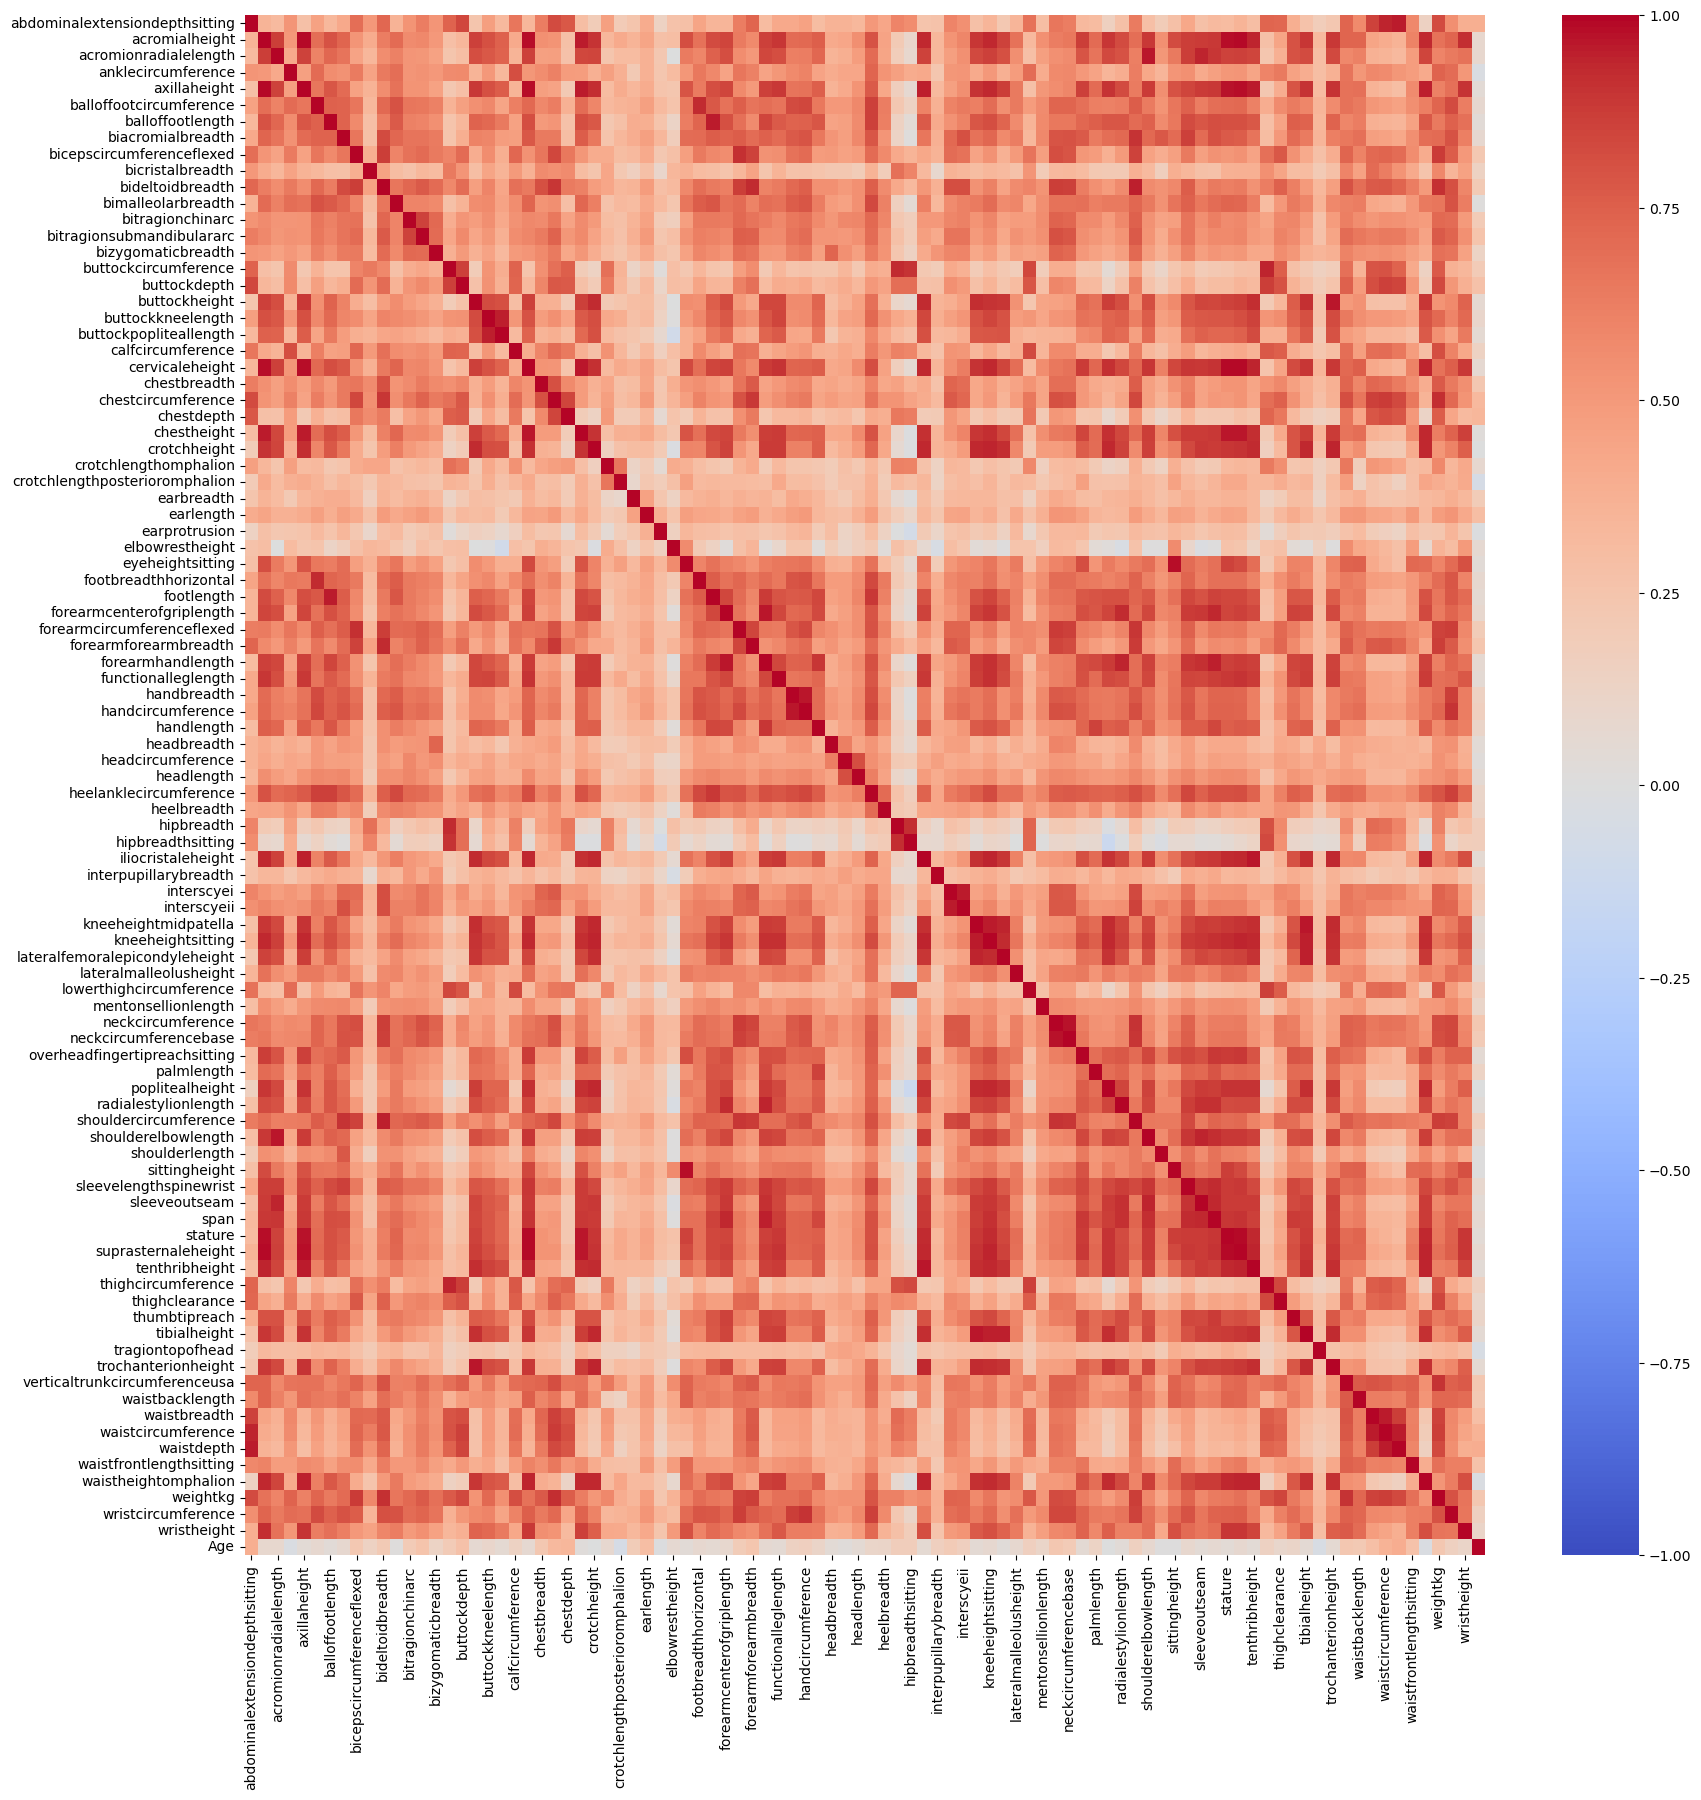

In [59]:
plt.figure(figsize=(20, 20))
sns.heatmap(df2.corr(numeric_only=True), vmin=-1, vmax=1, cmap="coolwarm");

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [61]:
#df.dropna(inplace=True)

In [62]:
X = df2.drop(columns=["DODRace"])
y = df2.DODRace

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101, stratify=y
)

In [64]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4615, 97)
Train target shape   :  (4615,)
Test features shape  :  (1154, 97)
Test target shape    :  (1154,)


In [65]:
print(y.value_counts(normalize=True))
print(100 * '-')
print(y_train.value_counts(normalize=True))
print(100 * '-')
print(y_test.value_counts(normalize=True))

DODRace
White       0.657306
Black       0.224996
Hispanic    0.117698
Name: proportion, dtype: float64
----------------------------------------------------------------------------------------------------
DODRace
White       0.657421
Black       0.224919
Hispanic    0.117660
Name: proportion, dtype: float64
----------------------------------------------------------------------------------------------------
DODRace
White       0.656846
Black       0.225303
Hispanic    0.117851
Name: proportion, dtype: float64


In [66]:
X_train.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,Age,WritingPreference
893,208,1393,325,204,1293,244,197,413,362,257,496,69,325,296,139,925,207,833,562,456,354,1453,287,1017,235,1227,813,563,356,38,65,27,242,772,104,267,346,297,569,477,1066,86,200,193,154,547,185,334,71,324,346,1035,645,434,455,478,543,490,72,358,122,386,434,1413,115,427,267,1162,349,142,885,863,574,1804,1693,1379,1068,543,159,803,464,131,862,1556,448,295,822,193,381,1018,685,165,806,Male,Colorado,25,Right hand
196,298,1497,335,230,1384,245,190,405,375,264,488,71,323,315,136,1058,280,947,641,514,387,1583,306,1082,261,1336,893,634,395,35,71,24,287,840,100,266,351,307,586,489,1199,82,206,195,150,578,204,347,72,348,397,1081,615,425,420,534,572,517,74,430,121,387,438,1476,114,434,274,1155,364,142,955,895,605,1813,1822,1502,1150,655,192,786,506,128,955,1768,520,358,1054,276,439,1063,945,180,889,Male,California,33,Left hand
3821,246,1502,353,220,1372,245,209,429,384,281,518,75,338,322,146,1077,250,937,640,529,378,1566,314,1089,282,1348,887,695,391,36,64,21,277,854,97,277,336,322,586,468,1149,83,205,185,165,605,214,351,67,369,418,1095,650,455,478,515,563,516,64,416,136,393,430,1501,112,435,261,1205,378,147,970,922,610,1790,1822,1492,1177,684,180,790,482,135,926,1730,475,335,955,226,398,1119,933,168,906,Male,Oklahoma,36,Right hand
3206,272,1482,342,210,1354,271,219,400,326,280,512,74,320,315,139,996,230,891,620,517,374,1532,310,1104,278,1294,867,573,322,40,66,20,245,799,106,287,356,297,610,506,1161,93,226,203,150,570,198,350,75,343,371,1076,650,447,445,512,567,499,80,391,119,428,473,1432,122,447,280,1124,366,125,915,912,615,1819,1786,1456,1149,577,153,841,479,137,910,1677,490,338,996,262,389,1087,842,174,862,Male,New York,47,Right hand
4500,211,1430,329,231,1324,230,191,362,296,280,432,71,307,286,134,994,235,898,632,525,395,1480,248,838,219,1236,861,592,353,35,58,20,221,763,93,260,330,265,485,467,1168,80,187,189,149,537,185,322,66,344,415,1067,650,340,370,495,550,516,66,422,106,315,362,1395,115,418,259,977,356,130,867,830,580,1752,1708,1403,1130,603,150,810,486,118,907,1572,440,290,803,190,370,1043,663,161,842,Female,Virginia,27,Right hand


In [67]:
X_test.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,Age,WritingPreference
2019,280,1467,336,243,1357,274,203,429,375,287,550,77,345,316,144,1040,268,913,641,502,426,1552,302,1117,256,1316,840,613,368,37,67,26,257,828,105,280,341,308,604,471,1154,88,212,194,154,574,203,350,74,349,390,1086,605,458,477,483,554,478,77,433,114,441,470,1460,114,431,252,1230,368,146,932,895,595,1826,1775,1474,1131,662,191,789,446,127,924,1713,508,344,1035,262,440,1068,953,185,865,Male,Minnesota,34,Left hand
4046,223,1393,329,220,1297,223,193,370,309,262,438,70,305,282,136,997,221,850,602,489,350,1473,243,892,234,1234,798,649,395,34,66,22,218,790,89,256,341,270,498,457,1129,84,205,182,154,577,200,316,66,343,380,1034,635,375,403,445,518,457,70,378,111,338,372,1376,110,401,258,1028,358,150,898,842,580,1734,1705,1389,1106,578,167,808,443,120,864,1560,426,289,817,196,340,1055,654,167,819,Female,Michigan,24,Right hand
5563,204,1292,300,210,1205,225,180,337,268,257,416,65,300,285,138,939,208,808,563,472,368,1349,251,894,229,1144,744,599,324,35,57,26,227,703,90,245,307,233,494,429,1027,76,178,181,156,534,172,304,63,334,366,965,625,352,358,435,493,458,60,375,102,329,365,1223,105,380,233,935,320,137,814,765,525,1563,1563,1287,1028,568,155,684,430,127,822,1446,402,285,797,191,332,959,564,152,773,Female,Europe,27,Right hand
3806,242,1435,331,217,1312,257,203,418,347,292,511,70,330,321,148,1010,252,905,611,503,379,1519,302,1047,258,1291,825,640,346,41,64,22,258,807,104,266,331,310,557,454,1084,85,204,181,157,579,202,335,73,348,383,1063,670,430,450,494,552,496,78,399,121,394,426,1364,110,433,241,1183,348,150,920,880,575,1715,1755,1423,1133,614,170,774,454,142,895,1672,482,332,961,244,370,1058,844,172,863,Male,Indiana,28,Right hand
653,229,1339,305,213,1238,247,189,438,330,262,514,73,323,310,143,953,238,820,572,463,347,1435,284,1022,233,1217,770,575,312,36,67,27,249,795,105,260,334,306,571,456,1042,84,200,186,157,570,193,323,67,332,348,986,625,436,458,453,519,450,70,375,134,392,437,1404,114,402,250,1185,334,156,910,847,536,1762,1673,1352,1031,597,174,776,438,137,831,1610,487,313,884,214,380,967,732,174,798,Male,Iowa,26,Right hand


In [68]:
X_train.shape, X_test.shape

((4615, 97), (1154, 97))

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

In [70]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [71]:
cat = X_train.select_dtypes("object").columns
cat

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [72]:
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat),
    remainder=MinMaxScaler(),
    verbose_feature_names_out=False,
)

In [73]:
from sklearn.pipeline import Pipeline

operations = [
    ("OneHotEncoder", column_trans),
    (
        "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101),
    ),
]

pipe_log_model = Pipeline(steps=operations)

In [74]:
from sklearn.pipeline import Pipeline

operations = [
    ("OneHotEncoder", column_trans),
    (
        "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101),
    ),
]

pipe_log_model = Pipeline(steps=operations)

In [75]:
pipe_log_model.fit(X_train, y_train)
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[235  14  11]
 [  6 111  19]
 [ 28  88 642]]
              precision    recall  f1-score   support

       Black       0.87      0.90      0.89       260
    Hispanic       0.52      0.82      0.64       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.78      0.86      0.81      1154
weighted avg       0.89      0.86      0.86      1154


Train_Set
[[ 948   56   34]
 [  27  445   71]
 [  55  360 2619]]
              precision    recall  f1-score   support

       Black       0.92      0.91      0.92      1038
    Hispanic       0.52      0.82      0.63       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.80      0.87      0.82      4615
weighted avg       0.90      0.87      0.88      4615



In [76]:
scoring = {
    "precision_Hispanic": make_scorer(
        precision_score, average=None, labels=["Hispanic"]
    ),
    "recall_Hispanic": make_scorer(recall_score, average=None, labels=["Hispanic"]),
    "f1_Hispanic": make_scorer(f1_score, average=None, labels=["Hispanic"]),
}

In [77]:
operations = [
    ("OneHotEncoder", column_trans),
    (
        "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101),
    ),
]

model = Pipeline(steps=operations)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.481198
train_precision_Hispanic    0.521894
test_recall_Hispanic        0.771515
train_recall_Hispanic       0.827909
test_f1_Hispanic            0.592045
train_f1_Hispanic           0.640199
dtype: float64

### Logistic Model GridsearchCV

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [79]:
recall_Hispanic = make_scorer(recall_score, average=None, labels=["Hispanic"])

In [80]:
param_grid = {
    "log__C": [0.5, 1],
    "log__penalty": ["l1", "l2"],
    "log__solver": ["liblinear", "lbfgs"],
}

In [81]:
operations = [
    ("OneHotEncoder", column_trans),
    (
        "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101),
    ),
]

model = Pipeline(steps=operations)


log_model_grid = GridSearchCV(
    model,
    param_grid,
    scoring=recall_Hispanic,
    cv=10,
    n_jobs=-1,
    return_train_score=True,
)

In [82]:
log_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'log__C': [0.5, 1], 'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [83]:
log_model_grid.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('log',
                 LogisticRegression(C=1, class_weight='balanced',
                                    max_iter=10000, random_state=101))])

In [84]:
pd.DataFrame(log_model_grid.cv_results_).loc[
    log_model_grid.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score     0.771515
mean_train_score    0.827909
Name: 7, dtype: object

In [85]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[235  14  11]
 [  6 111  19]
 [ 28  88 642]]
              precision    recall  f1-score   support

       Black       0.87      0.90      0.89       260
    Hispanic       0.52      0.82      0.64       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.78      0.86      0.81      1154
weighted avg       0.89      0.86      0.86      1154


Train_Set
[[ 948   56   34]
 [  27  445   71]
 [  55  360 2619]]
              precision    recall  f1-score   support

       Black       0.92      0.91      0.92      1038
    Hispanic       0.52      0.82      0.63       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.80      0.87      0.82      4615
weighted avg       0.90      0.87      0.88      4615



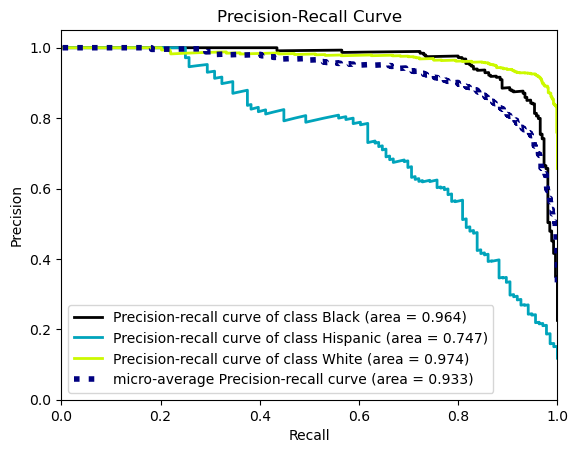

In [86]:
from scikitplot.metrics import plot_roc, plot_precision_recall

operations = [
    ("OneHotEncoder", column_trans),
    (
        "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101),
    ),
]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [87]:
# we can't use the average_precision_score function with the y_test variable because it's not a binary
from sklearn.metrics import average_precision_score

y_test_dummies = pd.get_dummies(y_test).values  # we do that for the sake of the average_precision_score function.

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

# Returns 0 black, 1 hispanic, 2 white scores.
# We got hispanic scores by specifying 1 here.

0.7467416182538664

In [88]:
y_pred = log_model_grid.predict(X_test)

log_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

# Since we will compare the scores we got from all models in the table below,
# we assign model scores to the variables

## 2. SVC

### Vanilla SVC model 

In [89]:
operations_svc = [
    ("OneHotEncoder", column_trans),
    ("svc", SVC(class_weight="balanced", random_state=101)),
]

pipe_svc_model = Pipeline(steps=operations_svc)

In [90]:
pipe_svc_model.fit(X_train, y_train)

eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[235  13  12]
 [  4 109  23]
 [ 20 100 638]]
              precision    recall  f1-score   support

       Black       0.91      0.90      0.91       260
    Hispanic       0.49      0.80      0.61       136
       White       0.95      0.84      0.89       758

    accuracy                           0.85      1154
   macro avg       0.78      0.85      0.80      1154
weighted avg       0.88      0.85      0.86      1154


Train_Set
[[ 950   52   36]
 [  22  452   69]
 [  55  399 2580]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92      1038
    Hispanic       0.50      0.83      0.63       543
       White       0.96      0.85      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.80      0.87      0.82      4615
weighted avg       0.90      0.86      0.87      4615



In [91]:
model = Pipeline(steps=operations_svc)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.456711
train_precision_Hispanic    0.503448
test_recall_Hispanic        0.758552
train_recall_Hispanic       0.834250
test_f1_Hispanic            0.569421
train_f1_Hispanic           0.627923
dtype: float64

###  SVC Model GridsearchCV

In [92]:
param_grid = {"svc__C": [0.5, 1], "svc__gamma": ["scale", "auto", 0.01]}

In [93]:
operations_svc = [
    ("OneHotEncoder", column_trans),
    ("svc", SVC(class_weight="balanced", random_state=101)),
]

model = Pipeline(steps=operations_svc)

svm_model_grid = GridSearchCV(
    model,
    param_grid,
    scoring=recall_Hispanic,
    cv=10,
    n_jobs=-1,
    return_train_score=True,
)

In [94]:
svm_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.5, 1],
                         'svc__gamma': ['scale', 'auto', 0.01]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [95]:
svm_model_grid.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('svc', SVC(C=1, class_weight='balanced', random_state=101))])

In [96]:
pd.DataFrame(svm_model_grid.cv_results_).loc[
    svm_model_grid.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score     0.758552
mean_train_score     0.83425
Name: 3, dtype: object

In [97]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[235  13  12]
 [  4 109  23]
 [ 20 100 638]]
              precision    recall  f1-score   support

       Black       0.91      0.90      0.91       260
    Hispanic       0.49      0.80      0.61       136
       White       0.95      0.84      0.89       758

    accuracy                           0.85      1154
   macro avg       0.78      0.85      0.80      1154
weighted avg       0.88      0.85      0.86      1154


Train_Set
[[ 950   52   36]
 [  22  452   69]
 [  55  399 2580]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92      1038
    Hispanic       0.50      0.83      0.63       543
       White       0.96      0.85      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.80      0.87      0.82      4615
weighted avg       0.90      0.86      0.87      4615



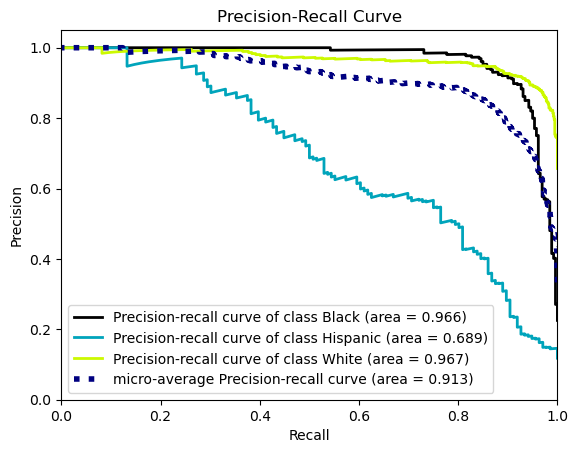

In [98]:
operations = [
    ("OneHotEncoder", column_trans),
    ("svc", SVC(C=1, class_weight="balanced", random_state=101)),
]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

decision_function = model.decision_function(X_test)

# y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test, decision_function)
plt.show();

In [99]:
decision_function

array([[-0.25612844,  1.00325241,  2.25595185],
       [ 0.89195662, -0.2388124 ,  2.25012752],
       [-0.19592464,  1.09009966,  2.17116119],
       ...,
       [ 1.1045256 , -0.20686875,  2.18035493],
       [-0.153075  ,  1.10406805,  2.09443233],
       [-0.26099374,  1.16938286,  2.24008703]])

In [100]:
model.classes_

array(['Black', 'Hispanic', 'White'], dtype=object)

In [101]:
average_precision_score(y_test_dummies[:, 1], decision_function[:, 1])

0.6891283060889173

In [102]:
y_pred = svm_model_grid.predict(X_test)

svc_AP = average_precision_score(y_test_dummies[:, 1], decision_function[:, 1])
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 3. RF

### Vanilla RF Model

In [103]:
cat

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [104]:
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), remainder="passthrough")

In [105]:
operations_rf = [
    ("OrdinalEncoder", column_trans),
    ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101)),
]

pipe_model_rf = Pipeline(steps=operations_rf)

pipe_model_rf.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [106]:
eval_metric(pipe_model_rf, X_train, y_train, X_test, y_test)

Test_Set
[[195   0  65]
 [  9   4 123]
 [ 14   2 742]]
              precision    recall  f1-score   support

       Black       0.89      0.75      0.82       260
    Hispanic       0.67      0.03      0.06       136
       White       0.80      0.98      0.88       758

    accuracy                           0.82      1154
   macro avg       0.79      0.59      0.58      1154
weighted avg       0.80      0.82      0.77      1154


Train_Set
[[1038    0    0]
 [   0  542    1]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [107]:
operations_rf = [
    ("OrdinalEncoder", column_trans),
    ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101)),
]

model = Pipeline(steps=operations_rf)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=5, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

test_precision_Hispanic     0.866667
train_precision_Hispanic    1.000000
test_recall_Hispanic        0.027659
train_recall_Hispanic       1.000000
test_f1_Hispanic            0.053387
train_f1_Hispanic           1.000000
dtype: float64

### RF Model GridsearchCV

In [108]:
param_grid = {
    "RF_model__n_estimators": [400, 500],
    "RF_model__max_depth": [2, 3],
    # 'RF_model__min_samples_split':[18,20,22],
    # 'RF_model__max_features': ['auto', None, 15, 20]
}

In [109]:
operations_rf = [
    ("OrdinalEncoder", column_trans),
    ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101)),
]

model = Pipeline(steps=operations_rf)
rf_grid_model = GridSearchCV(
    model, param_grid, scoring=recall_Hispanic, n_jobs=-1, return_train_score=True
)

In [110]:
rf_grid_model.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3],
                         'RF_model__n_estimators': [400, 500]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [111]:
rf_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=3,
                                        n_estimators=400, random_state=101))])

In [112]:
rf_grid_model.best_params_

{'RF_model__max_depth': 3, 'RF_model__n_estimators': 400}

In [113]:
pd.DataFrame(rf_grid_model.cv_results_).loc[
    rf_grid_model.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score     0.609582
mean_train_score    0.663906
Name: 2, dtype: object

In [114]:
rf_grid_model.best_score_

0.6095820591233435

In [115]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[197  36  27]
 [ 17  77  42]
 [ 91 230 437]]
              precision    recall  f1-score   support

       Black       0.65      0.76      0.70       260
    Hispanic       0.22      0.57      0.32       136
       White       0.86      0.58      0.69       758

    accuracy                           0.62      1154
   macro avg       0.58      0.63      0.57      1154
weighted avg       0.74      0.62      0.65      1154


Train_Set
[[ 797  142   99]
 [  47  355  141]
 [ 241 1035 1758]]
              precision    recall  f1-score   support

       Black       0.73      0.77      0.75      1038
    Hispanic       0.23      0.65      0.34       543
       White       0.88      0.58      0.70      3034

    accuracy                           0.63      4615
   macro avg       0.62      0.67      0.60      4615
weighted avg       0.77      0.63      0.67      4615



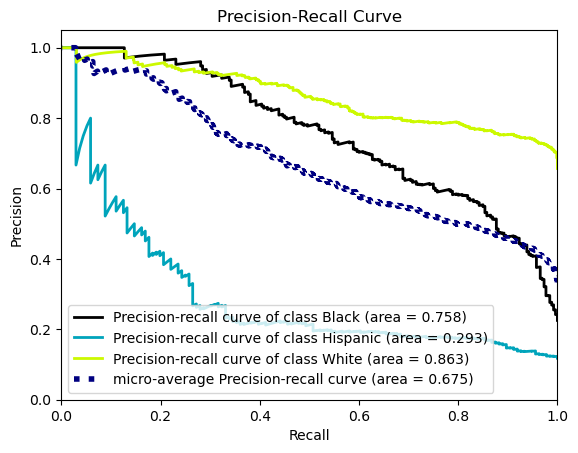

In [116]:
operations_rf = [
    ("OrdinalEncoder", column_trans),
    (
        "RF_model",
        RandomForestClassifier(
            class_weight="balanced", max_depth=2, n_estimators=400, random_state=101
        ),
    ),
]

model = Pipeline(steps=operations_rf)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [117]:
average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.2930735411262894

In [118]:
y_pred = rf_grid_model.predict(X_test)

rf_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
rf_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 4. XGBoost

### Vanilla XGBoost Model

In [119]:
operations_xgb = [
    ("OrdinalEncoder", column_trans),
    ("XGB_model", XGBClassifier(random_state=101)),
]

pipe_model_xgb = Pipeline(steps=operations_xgb)
# sorting will be same as classification_report.
y_train_xgb = y_train.map({"Black": 0, "Hispanic": 1, "White": 2})
y_test_xgb = y_test.map({"Black": 0, "Hispanic": 1, "White": 2})
# If the target is not numeric in xgb 1.6 and higher versions, it returns an error.
# That's why we do the conversion manually.


pipe_model_xgb.fit(X_train, y_train_xgb)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [120]:
eval_metric(pipe_model_xgb, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[225   4  31]
 [ 14  59  63]
 [ 17   5 736]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       260
           1       0.87      0.43      0.58       136
           2       0.89      0.97      0.93       758

    accuracy                           0.88      1154
   macro avg       0.88      0.76      0.79      1154
weighted avg       0.88      0.88      0.87      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [121]:
from sklearn.utils import class_weight

classes_weights = class_weight.compute_sample_weight(
    class_weight="balanced", y=y_train_xgb
)
classes_weights

array([2.8330264 , 0.50703142, 0.50703142, ..., 0.50703142, 1.4820167 ,
       0.50703142])

In [122]:
my_dict = {"weights": classes_weights, "label": y_train_xgb}

comp = pd.DataFrame(my_dict)

comp.head()

,weights,label
893,2.833026,1
196,0.507031,2
3821,0.507031,2
3206,0.507031,2
4500,1.482017,0


In [123]:
comp.groupby("label").value_counts()

label  weights 
0      1.482017    1038
1      2.833026     543
2      0.507031    3034
Name: count, dtype: int64

In [124]:
pipe_model_xgb.fit(X_train, y_train_xgb, XGB_model__sample_weight=classes_weights)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [125]:
eval_metric(pipe_model_xgb, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[227   9  24]
 [ 13  65  58]
 [ 21  19 718]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       260
           1       0.70      0.48      0.57       136
           2       0.90      0.95      0.92       758

    accuracy                           0.88      1154
   macro avg       0.82      0.77      0.79      1154
weighted avg       0.87      0.88      0.87      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [126]:
scoring_xgb = {
    "precision_Hispanic": make_scorer(precision_score, average=None, labels=[1]),
    "recall_Hispanic": make_scorer(recall_score, average=None, labels=[1]),
    "f1_Hispanic": make_scorer(f1_score, average=None, labels=[1]),
}

In [127]:
operations_xgb = [
    ("OrdinalEncoder", column_trans),
    ("XGB_model", XGBClassifier(random_state=101)),
]

model = Pipeline(steps=operations_xgb)

scores = cross_validate(
    model,
    X_train,
    y_train_xgb,
    scoring=scoring_xgb,
    cv=5,
    n_jobs=-1,
    return_train_score=True,
    fit_params={"XGB_model__sample_weight": classes_weights},
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

test_precision_Hispanic     0.730739
train_precision_Hispanic    1.000000
test_recall_Hispanic        0.484285
train_recall_Hispanic       1.000000
test_f1_Hispanic            0.581269
train_f1_Hispanic           1.000000
dtype: float64

### XGBoost Model GridsearchCV

In [128]:
param_grid = {
    "XGB_model__n_estimators": [20, 40],
    "XGB_model__max_depth": [1, 2],
    "XGB_model__learning_rate": [0.03, 0.05],
    "XGB_model__subsample": [0.8, 1],
    "XGB_model__colsample_bytree": [0.8, 1],
}

In [129]:
operations_xgb = [
    ("OrdinalEncoder", column_trans),
    ("XGB_model", XGBClassifier(random_state=101)),
]

model = Pipeline(steps=operations_xgb)

xgb_grid_model = GridSearchCV(
    model,
    param_grid,
    scoring=make_scorer(recall_score, average=None, labels=[1]),
    cv=5,
    n_jobs=-1,
    return_train_score=True,
)

In [130]:
xgb_grid_model.fit(X_train, y_train_xgb, XGB_model__sample_weight=classes_weights)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('XGB_model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks...
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=101, ...))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bytree': [0.8, 1],
                         'XGB_model__learning_rate': [0.03, 0.05],
                         'XGB_model__max_depth': [1, 2],
                         'XGB_model__n_estimators': [20, 40],
                         'XGB_model__subsample': [0.8, 1]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=[1]))

In [131]:
xgb_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=2, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=40,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [132]:
xgb_grid_model.best_params_

{'XGB_model__colsample_bytree': 1,
 'XGB_model__learning_rate': 0.05,
 'XGB_model__max_depth': 2,
 'XGB_model__n_estimators': 40,
 'XGB_model__subsample': 1}

In [133]:
pd.DataFrame(xgb_grid_model.cv_results_).loc[
    xgb_grid_model.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score      0.58386
mean_train_score    0.655621
Name: 31, dtype: object

In [134]:
xgb_grid_model.best_score_

0.5838600067957866

In [135]:
eval_metric(xgb_grid_model, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[202  35  23]
 [ 16  75  45]
 [104 169 485]]
              precision    recall  f1-score   support

           0       0.63      0.78      0.69       260
           1       0.27      0.55      0.36       136
           2       0.88      0.64      0.74       758

    accuracy                           0.66      1154
   macro avg       0.59      0.66      0.60      1154
weighted avg       0.75      0.66      0.68      1154


Train_Set
[[ 799  144   95]
 [  56  350  137]
 [ 281  643 2110]]
              precision    recall  f1-score   support

           0       0.70      0.77      0.74      1038
           1       0.31      0.64      0.42       543
           2       0.90      0.70      0.78      3034

    accuracy                           0.71      4615
   macro avg       0.64      0.70      0.65      4615
weighted avg       0.79      0.71      0.73      4615



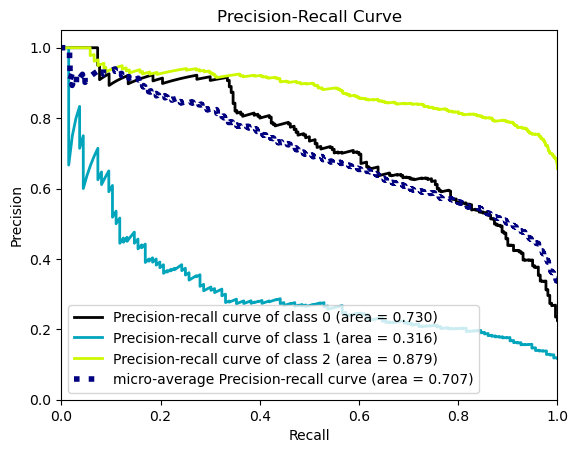

In [136]:
from scikitplot.metrics import plot_roc, precision_recall_curve


operations_xgb = [
    ("OrdinalEncoder", column_trans),
    (
        "XGB_model",
        XGBClassifier(
            colsample_bytree=0.8,
            learning_rate=0.05,
            max_depth=2,
            n_estimators=20,
            subsample=0.8,
            random_state=101,
        ),
    ),
]

model = Pipeline(steps=operations_xgb)

model.fit(X_train, y_train_xgb, XGB_model__sample_weight=classes_weights)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test_xgb, y_pred_proba)
plt.show()

In [137]:
y_test_xgb_dummies = pd.get_dummies(y_test_xgb).values

In [138]:
average_precision_score(y_test_xgb_dummies[:, 1], y_pred_proba[:, 1])

0.3157006688300224

In [139]:
y_pred = xgb_grid_model.predict(X_test)

xgb_AP = average_precision_score(y_test_xgb_dummies[:, 1], y_pred_proba[:, 1])
xgb_f1 = f1_score(y_test_xgb, y_pred, average=None, labels=[1])
xgb_recall = recall_score(y_test_xgb, y_pred, average=None, labels=[1])

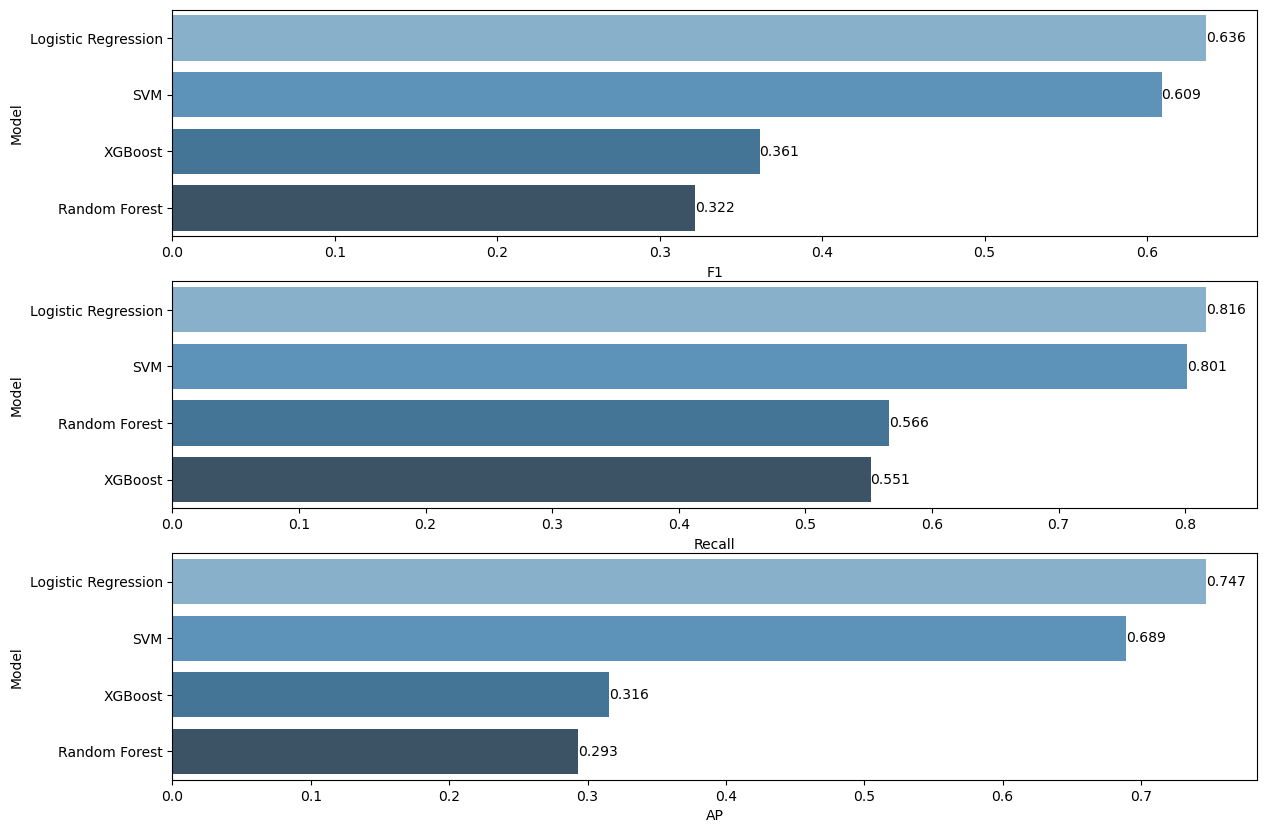

In [140]:
compare = pd.DataFrame(
    {
        "Model": ["Logistic Regression", "SVM", "Random Forest", "XGBoost"],
        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
        "AP": [log_AP, svc_AP, rf_AP, xgb_AP],
    }
)


plt.figure(figsize=(14, 10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax = sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax = sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax = sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show();

---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [141]:
#!pip install imblearn

In [142]:
#conda install -c conda-forge imbalanced-learn

In [143]:
# equalizes or approximates minority classes to the majority class.
from imblearn.over_sampling import SMOTE

# equalizes or converges the majority class to the minority class
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

# imblearn.pipeline is different from the pipeline library of the sklearn library.
# While the sklearn pipeline only runs the fit, transform, predict and predict_proba functions,
# imblearn.pipeline also runs the resample function.

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Users\o-m-r\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)

In [152]:
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat),
    remainder=MinMaxScaler(),
)


In [153]:
X_train_ohe = column_trans.fit_transform(X_train)

In [154]:
over = SMOTE()
X_train_over, y_train_over = over.fit_resample(X_train_ohe, y_train)

NameError: name 'SMOTE' is not defined

In [ ]:
X_train_over.shape

In [ ]:
y_train_over.value_counts()

In [ ]:
under = RandomUnderSampler()
X_train_under, y_train_under = under.fit_resample(X_train_ohe, y_train)

In [ ]:
X_train_under.shape

In [ ]:
y_train_under.value_counts()

In [ ]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train_ohe, y_train)

In [ ]:
y_resampled_over.value_counts()

In [ ]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train_ohe, y_train)

In [ ]:
y_resampled_under.value_counts()

In [ ]:
steps = [("o", over), ("u", under)]


pipeline = imbpipeline(steps=steps)

# First the number of hispanic cals will be increased to 1000 as per our instruction,
# and then the white class will be reduced to 2500.
X_resampled, y_resampled = pipeline.fit_resample(X_train_ohe, y_train)

In [ ]:
y_resampled.value_counts()

In [ ]:
y_train.value_counts()

## Logistic Regression Over/ Under Sampling

In [150]:
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat),
    remainder=MinMaxScaler(),
)

In [151]:
operations = [
    ("OneHotEncoder", column_trans),
    ("o", over),
    ("u", under),
    ("log", LogisticRegression(max_iter=10000, random_state=101)),
]

NameError: name 'over' is not defined

In [ ]:
smote_pipeline = imbpipeline(steps=operations)

In [ ]:
smote_pipeline.fit(X_train, y_train)

In [ ]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

In [ ]:
model = imbpipeline(steps=operations)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

## Other Evaluation Metrics for Multiclass Classification

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [ ]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef?
matthews_corrcoef(y_test, y_pred)

In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score?
cohen_kappa_score(y_test, y_pred)

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [155]:
column_trans_final = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat),
    remainder=MinMaxScaler(),
)

operations_final = [
    ("OneHotEncoder", column_trans_final),
    (
        "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101),
    ),
]

final_model = Pipeline(steps=operations_final)

In [156]:
final_model.fit(X, y)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [157]:
X[X.Gender == "Male"].describe()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Age
count,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.00000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000
mean,255.449090,1442.946397,335.819441,229.590921,1331.098487,252.16594,201.229546,416.004360,358.579636,275.632213,510.927674,74.844063,331.655809,315.718389,142.434983,1021.294178,246.362401,889.500385,619.217235,504.001026,392.426520,1519.422160,289.786868,1060.496794,254.390100,1293.040267,847.637599,623.143114,356.354706,36.095153,64.171070,23.109772,244.823544,804.885099,101.893819,271.573993,349.573480,310.528084,580.702231,480.928956,1132.125673,88.379841,212.571172,193.509361,154.183637,574.708130,199.760708,344.002052,72.564504,346.256732,379.948448,1063.412670,639.948705,431.393947,450.628623,489.366504,555.224929,492.625545,73.061554,409.670685,122.684534,398.192101,435.159528,1428.469351,116.610156,430.684791,268.313927,1179.902539,364.305976,149.832265,918.678636,897.179277,594.007951,1816.628879,1758.385483,1440.699667,1122.444473,626.335214,180.739420,813.085407,469.222878,131.116697,902.586817,1666.783278,478.017953,327.110798,943.043344,238.560400,388.017440,1058.239805,858.714286,176.168761,848.762247,30.172352
std,37.295117,62.356906,17.281413,14.579399,58.714251,12.89351,10.329358,19.074837,34.511924,17.512428,32.450260,4.097052,13.970798,16.640502,6.141613,76.330564,26.4

In [158]:
male_mean_human = X[X.Gender == "Male"].describe(include="all").loc["mean"]
male_mean_human

abdominalextensiondepthsitting      255.44909
acromialheight                    1442.946397
acromionradialelength              335.819441
anklecircumference                 229.590921
axillaheight                      1331.098487
balloffootcircumference             252.16594
balloffootlength                   201.229546
biacromialbreadth                   416.00436
bicepscircumferenceflexed          358.579636
bicristalbreadth                   275.632213
bideltoidbreadth                   510.927674
bimalleolarbreadth                  74.844063
bitragionchinarc                   331.655809
bitragionsubmandibulararc          315.718389
bizygomaticbreadth                 142.434983
buttockcircumference              1021.294178
buttockdepth                       246.362401
buttockheight                      889.500385
buttockkneelength                  619.217235
buttockpopliteallength             504.001026
calfcircumference                   392.42652
cervicaleheight                   

In [159]:
male_mean_human["Gender"] = "Male"
male_mean_human["SubjectsBirthLocation"] = "California"
male_mean_human["WritingPreference"] = "Right hand"

In [160]:
pd.DataFrame(male_mean_human).T

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,Age,WritingPreference
mean,255.44909,1442.946397,335.819441,229.590921,1331.098487,252.16594,201.229546,416.00436,358.579636,275.632213,510.927674,74.844063,331.655809,315.718389,142.434983,1021.294178,246.362401,889.500385,619.217235,504.001026,392.42652,1519.42216,289.786868,1060.496794,254.3901,1293.040267,847.637599,623.143114,356.354706,36.095153,64.17107,23.109772,244.823544,804.885099,101.893819,271.573993,349.57348,310.528084,580.702231,480.928956,1132.125673,88.379841,212.571172,193.509361,154.183637,574.70813,199.760708,344.002052,72.564504,346.256732,379.948448,1063.41267,639.948705,431.393947,450.628623,489.366504,555.224929,492.625545,73.061554,409.670685,122.684534,398.192101,435.159528,1428.469351,116.610156,430.684791,268.313927,1179.902539,364.305976,149.832265,918.678636,897.179277,594.007951,1816.628879,1758.385483,1440.699667,1122.444473,626.335214,180.73942,813.085407,469.222878,131.116697,902.586817,1666.783278,478.017953,327.110798,943.043344,238.5604,388.01744,1058.239805,858.714286,176.168761,848.762247,Male,California,30.172352,Right hand


In [161]:
final_model.predict(pd.DataFrame(male_mean_human).T)

array(['Hispanic'], dtype=object)

In [162]:
from sklearn.metrics import matthews_corrcoef

y_pred = final_model.predict(X_test)

matthews_corrcoef(y_test, y_pred)

# Accuracy is an unreliable metric for unstable datasets. For this reason,
# matthews_corrcoef and cohen_kappa_score can be used for accuracy of
# imbalanced datasets.

0.770272676199451

In [163]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7619920325342797

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___